# **Análisis exploratorio de los datos**


The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuro estilo de los gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## **Carga del dataset situado en PostgreSQL**

In [2]:
import psycopg2

# Datos de conexión a la base de datos
conn = psycopg2.connect(
    host="localhost",
    database="fraude_db",
    user="fraude_user",
    password="0000"
)

# Ejecuto la consulta y cargo el resultado en un DataFrame
df = pd.read_sql("SELECT * FROM creditcard_transactions;", conn)
conn.close()

C:\Users\Ruben\AppData\Local\Temp\ipykernel_17664\3701760687.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM creditcard_transactions;", conn)


## **Inspección inicial**

In [3]:
print("===== Primeras filas =====")
display(df.head(7)) 

print("\n===== Información general =====")
display(df.info())

print("\n===== Estadísticas descriptivas de columnas numéricas =====")
display(df.describe())

===== Primeras filas =====


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0



===== Información general =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 

None


===== Estadísticas descriptivas de columnas numéricas =====


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.197914e-15,3.353041e-16,-1.430631e-15,2.094852e-15,9.548182e-16,1.491305e-15,-5.532517e-16,1.233440e-16,-2.406805e-15,...,1.675023e-16,-3.325099e-16,2.606590e-16,4.472268e-15,5.237130e-16,1.686868e-15,-3.655413e-16,-1.220529e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Comprobación de nulos y duplicados**

In [4]:
print("\n===== Valores nulos por columna =====")
null_counts = df.isnull().sum()
display(null_counts)

dup_count = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {dup_count}")


===== Valores nulos por columna =====


time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64


Número de filas duplicadas: 1081


In [5]:
# Elimino filas duplicadas
if dup_count > 0:
    df = df.drop_duplicates()
    print("\n===== Se han eliminado las filas duplicadas =====")

# Confirmo la limpieza
print("Duplicados restantes:", df.duplicated().sum())


===== Se han eliminado las filas duplicadas =====
Duplicados restantes: 0


## **Distribución de la variable objetivo**

Número de transacciones por clase:
   Clase  Número de transacciones
0      0                   283253
1      1                      473


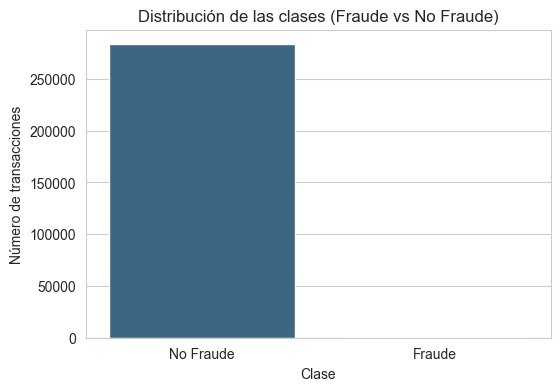

In [6]:
# Variable objetivo -> 'Class' indica si es fraudulenta o no.

# Cuento las clases (0: No Fraude, 1: Fraude)
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Clase', 'Número de transacciones']

print("Número de transacciones por clase:")
print(class_counts)

# Visualización
plt.figure(figsize=(6, 4))
sns.barplot(data=class_counts, x="Clase", y="Número de transacciones", hue="Clase", palette="viridis", legend=False)
plt.title('Distribución de las clases (Fraude vs No Fraude)')
plt.xlabel('Clase')
plt.ylabel('Número de transacciones')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

## **Distribución de la frecuencia e importes en transacciones fraudulentas**

Estadísticas descriptivas de los importes de transacciones fraudulentas:
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64


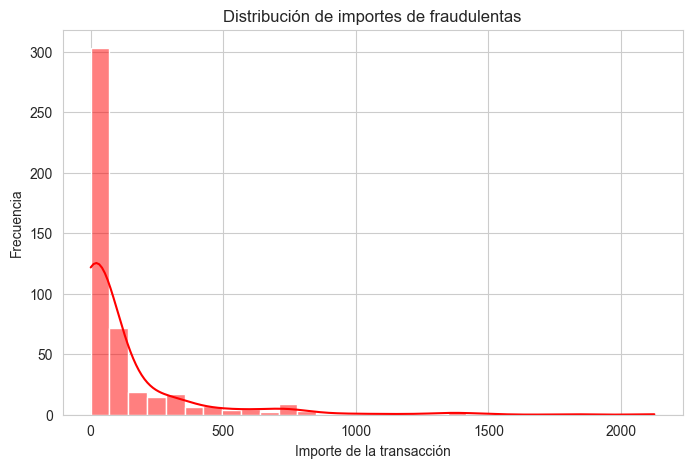

In [7]:
# Filtro las transacciones fraudulentas (Class = 1)
fraudulent_transactions = df[df['class'] == 1]

# Muestro un resumen de los importes de transacciones fraudulentas
print("Estadísticas descriptivas de los importes de transacciones fraudulentas:")
print(fraudulent_transactions['amount'].describe())

# Creo un histograma para la distribución de los importes
plt.figure(figsize=(8, 5))
sns.histplot(fraudulent_transactions['amount'], bins=30, kde=True, color='red')
plt.title('Distribución de importes de fraudulentas')
plt.xlabel('Importe de la transacción')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# Reviso si hay valores no numéricos en columnas numéricas
for col in df.columns:
    if df[col].dtype == object:      # Si hay valores tipo texto en una columna numérica
        print(f"Problema en la columna: {col}")
        print(df[col].unique()[:5])  # Muestro los primeros valores diferentes

print("No hay inconsistencias")

No hay inconsistencias


## **Guardo el dataset modificado**

In [9]:
# Guardo el dataset limpio
df.to_csv('creditcard_clean.csv', index=False)

print(f"\nDataset nuevo guardado")


Dataset nuevo guardado
